Q1. Explain the concept of homogeneity and completeness in clustering evaluation. How are they
calculated?

In clustering evaluation, **homogeneity** and **completeness** are two important metrics used to assess the quality of clustering results, especially in the context of how well the clusters represent the true classes or categories of the data.

### 1. Homogeneity

**Homogeneity** is a measure that evaluates how similar the elements within each cluster are to each other, with respect to the true class labels. A clustering result is considered **homogeneous** if all of its clusters contain only data points that are members of a single class.

**Calculation of Homogeneity:**

- Let \( C \) be the set of true classes, and \( K \) be the set of clusters.
- For a cluster \( k \in K \), the homogeneity of that cluster is high if all elements in \( k \) belong to the same class \( c \in C \).

Homogeneity can be formally defined using the concept of conditional entropy:

\[
H(C|K) = - \sum_{c \in C} \sum_{k \in K} \frac{|c \cap k|}{n} \log \left( \frac{|c \cap k|}{|k|} \right)
\]

where:
- \( |c \cap k| \) is the number of data points that are in both class \( c \) and cluster \( k \).
- \( |k| \) is the total number of data points in cluster \( k \).
- \( n \) is the total number of data points.

The homogeneity score is then:

\[
\text{Homogeneity} = 1 - \frac{H(C|K)}{H(C)}
\]

where \( H(C) \) is the entropy of the true class distribution.

A homogeneity score of 1 indicates perfect homogeneity, meaning each cluster contains only data points that are members of a single class.

### 2. Completeness

**Completeness** is a measure that evaluates how well all members of a given class are assigned to the same cluster. A clustering result is considered **complete** if all data points that are members of a given class are assigned to the same cluster.

**Calculation of Completeness:**

- Completeness is high if all elements that are members of a class \( c \in C \) are elements of the same cluster \( k \in K \).

Completeness can be defined using the conditional entropy:

\[
H(K|C) = - \sum_{k \in K} \sum_{c \in C} \frac{|c \cap k|}{n} \log \left( \frac{|c \cap k|}{|c|} \right)
\]

where:
- \( |c| \) is the number of data points in class \( c \).

The completeness score is then:

\[
\text{Completeness} = 1 - \frac{H(K|C)}{H(K)}
\]

where \( H(K) \) is the entropy of the cluster distribution.

A completeness score of 1 indicates perfect completeness, meaning all members of each class are entirely assigned to the same cluster.

### Intuition Behind Homogeneity and Completeness

- **Homogeneity** focuses on minimizing the impurity within clusters, ensuring that each cluster predominantly represents a single true class.
- **Completeness** focuses on minimizing the fragmentation of each true class across multiple clusters, ensuring that members of each class are grouped together.

### Conclusion

Both homogeneity and completeness provide insights into the quality of clustering but focus on different aspects. When evaluating clustering results, it's useful to consider both metrics to get a comprehensive understanding of how well the clustering algorithm has performed in capturing the underlying structure of the data.

## write a program for  Explain the concept of homogeneity and completeness in clustering evaluation.

To explain the concepts of homogeneity and completeness in clustering evaluation, we will write a Python program that uses a real dataset. We'll use the Iris dataset for this purpose. The program will demonstrate how to calculate homogeneity and completeness scores after performing clustering using the KMeans algorithm.



In [1]:
#Step 1: Importing Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score
import matplotlib.pyplot as plt


In [2]:
# Step 2: Loading and Preparing the Dataset
# Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y_true


In [3]:
# Step 3: Performing KMeans Clustering
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['cluster'] = y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
#
#Step 4: Calculating Homogeneity and Completeness
# Calculate Homogeneity and Completeness
homogeneity = homogeneity_score(y_true, y_kmeans)
completeness = completeness_score(y_true, y_kmeans)

print(f"Homogeneity: {homogeneity:.2f}")
print(f"Completeness: {completeness:.2f}")


Homogeneity: 0.75
Completeness: 0.76


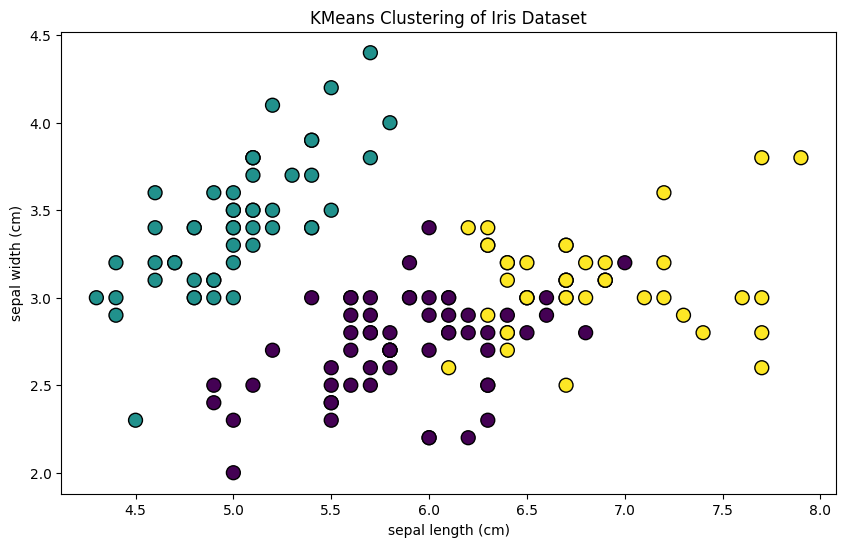

In [5]:
#bStep 5: Visualizing the Clusters
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', s=100, edgecolor='k')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


Q2. What is the V-measure in clustering evaluation? How is it related to homogeneity and completeness?





**V-measure** is an external clustering evaluation metric used to assess the quality of clustering algorithms by comparing their results with a ground truth class assignment. It is specifically designed to evaluate how well the clusters formed by the algorithm match the actual class labels, balancing two key aspects:

1. **Homogeneity**: A clustering result satisfies homogeneity if all of its clusters contain only data points that are members of a single class. In other words, each cluster should contain points from only one true category. Homogeneity measures how "pure" the clusters are with respect to the ground truth classes.

2. **Completeness**: A clustering result satisfies completeness if all data points that are members of a given class are assigned to the same cluster. This means that points from the same true category should not be split across multiple clusters. Completeness measures how well all the points in each true class are assigned to the same cluster.

**V-measure** is the harmonic mean of homogeneity (h) and completeness (c), ensuring that both aspects are equally weighted. It is defined as:

\[
\text{V-measure} = 2 \times \frac{h \times c}{h + c}
\]

where:
- \(h\) is the homogeneity score.
- \(c\) is the completeness score.

### **Relation to Homogeneity and Completeness**

- **Homogeneity** and **completeness** are complementary: homogeneity ensures that clusters are "pure" with respect to their true class labels, while completeness ensures that all members of a class are grouped into the same cluster.
- The **V-measure** combines these two scores to provide a single metric that balances the two properties, ensuring that a good clustering result is both homogeneous and complete.
- If a clustering algorithm achieves high scores on both homogeneity and completeness, the V-measure will also be high, indicating a strong match between the clustering result and the true class labels.
- If one of the scores is low, the V-measure will also be low, indicating a poor clustering result.

By using V-measure, one can effectively evaluate and compare different clustering algorithms or configurations, ensuring that the selected model provides an optimal balance between creating pure clusters and grouping all relevant data points together.

## write a program for V-measure in clustering evaluation

To demonstrate the use of V-measure in clustering evaluation, we'll write a Python program using a real-world dataset, specifically the Wine dataset from the UCI Machine Learning Repository. The Wine dataset contains chemical analysis of wines from three different cultivars, making it suitable for clustering evaluation.



In [6]:
# Step 1: Importing Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt


In [7]:
# Step 2: Loading and Preparing the Dataset
# Load the Wine dataset
wine = load_wine()
X = wine.data
y_true = wine.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y_true


In [8]:
# Step 3: Performing KMeans Clustering
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['cluster'] = y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# Step 4: Calculating V-measure
# Calculate V-measure
v_measure = v_measure_score(y_true, y_kmeans)
print(f"V-measure: {v_measure:.2f}")


V-measure: 0.43


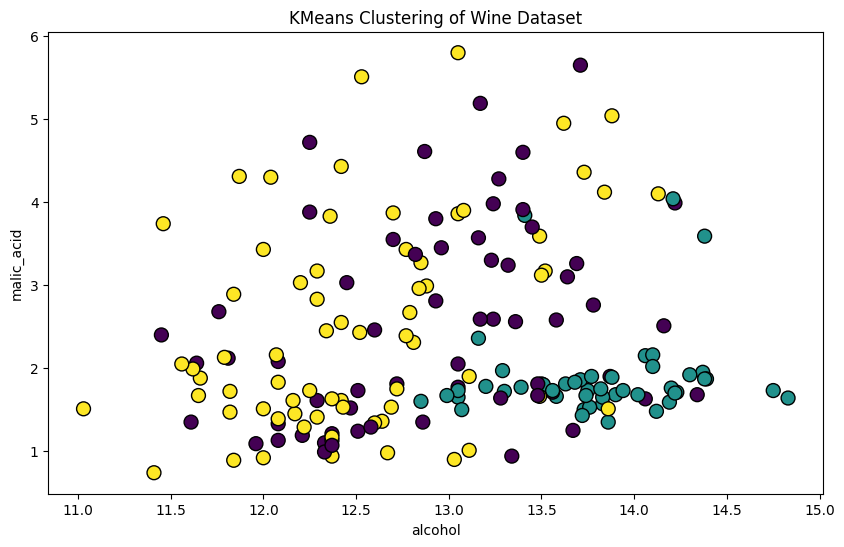

In [10]:
# Step 5: Visualizing the Clusters
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', s=100, edgecolor='k')
plt.title('KMeans Clustering of Wine Dataset')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()


Q3. How is the Silhouette Coefficient used to evaluate the quality of a clustering result? What is the range
of its values?

The **Silhouette Coefficient** is a metric used to evaluate the quality of clustering results. It provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

### How the Silhouette Coefficient Works:

For each point \(i\) in the dataset:

1. **Calculate the mean distance \(a(i)\) to all other points in the same cluster** (intra-cluster distance). This measures how closely the point is grouped with points in its own cluster.

2. **Calculate the mean distance \(b(i)\) to all points in the nearest different cluster** (inter-cluster distance). This represents how far the point is from the nearest cluster that it does not belong to.

3. The **Silhouette Coefficient \(s(i)\) for a point** is defined as:

\[
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
\]

- If \(a(i) < b(i)\), the value will be closer to 1, indicating the point is well clustered.
- If \(a(i) \approx b(i)\), the value will be around 0, suggesting the point is on or very close to the decision boundary between two clusters.
- If \(a(i) > b(i)\), the value will be negative, indicating the point might be misclassified or assigned to the wrong cluster.

### Range of Silhouette Coefficient Values:

- The Silhouette Coefficient value ranges from **-1** to **+1**:
  - **+1** indicates that the point is far away from the neighboring clusters, which is an ideal situation.
  - **0** indicates that the point is on or very close to the boundary between two clusters.
  - **-1** indicates that the point might have been assigned to the wrong cluster.

### Interpretation:

- **High average Silhouette Coefficient close to +1**: Indicates that the clustering configuration is appropriate, as most points are well matched to their own clusters and poorly matched to neighboring clusters.
- **Silhouette Coefficient around 0**: Indicates that the clusters are overlapping or there are points that are equally far away from their own cluster as the neighboring cluster.
- **Negative Silhouette Coefficient**: Indicates that there might be points assigned to the wrong clusters or the clusters themselves are not well separated.

In practice, the **average Silhouette Coefficient** across all points in the dataset is used to evaluate the overall quality of the clustering result. A higher average value suggests better-defined clusters.

Q4. How is the Davies-Bouldin Index used to evaluate the quality of a clustering result? What is the range
of its values?

The **Davies-Bouldin Index (DBI)** is a metric used to evaluate the quality of clustering results. It is particularly useful in unsupervised learning, where the true labels of the data are unknown, and we need to assess how well the clustering algorithm has partitioned the data.

### How the Davies-Bouldin Index Works:

The DBI is calculated based on the ratio of the sum of within-cluster scatter to between-cluster separation. Here's a step-by-step explanation of how the DBI is computed:

1. **Within-Cluster Scatter (Si)**: This measures the average distance between each point in a cluster and the cluster centroid. It represents the "tightness" or compactness of the cluster. A smaller value indicates that the cluster points are closer to each other.

2. **Between-Cluster Separation (Mij)**: This measures the distance between the centroids of two clusters. A larger distance indicates that the clusters are well-separated.

3. **Similarity Measure (Rij)**: For each pair of clusters \(i\) and \(j\), a similarity measure \(R_{ij}\) is defined as:
   \[
   R_{ij} = \frac{S_i + S_j}{M_{ij}}
   \]
   where \(S_i\) and \(S_j\) are the within-cluster scatter measures for clusters \(i\) and \(j\), respectively, and \(M_{ij}\) is the distance between the centroids of clusters \(i\) and \(j\).

4. **Cluster Evaluation (Di)**: For each cluster \(i\), the DBI is the maximum \(R_{ij}\) across all other clusters \(j\). This measures how similar cluster \(i\) is to its most similar cluster.

   \[
   D_i = \max_{j \neq i} R_{ij}
   \]

5. **Davies-Bouldin Index (DBI)**: The final DBI score is the average of all the \(D_i\) values across all clusters.

   \[
   \text{DBI} = \frac{1}{k} \sum_{i=1}^{k} D_i
   \]
   where \(k\) is the number of clusters.

### Interpretation of Davies-Bouldin Index:

- **Range of Values**: The Davies-Bouldin Index ranges from **0** to **∞**.
  
- **Lower Values are Better**: A lower DBI value indicates that the clusters are compact and well-separated, which means a better clustering result. Ideally, a DBI value closer to **0** indicates minimal intra-cluster distances (tight clusters) and maximal inter-cluster distances (well-separated clusters).

- **Higher Values Indicate Poorer Clustering**: A higher DBI value suggests overlapping or loosely compacted clusters, indicating poorer clustering quality.

### Use of Davies-Bouldin Index:

The DBI is used in selecting the optimal number of clusters in a dataset when using clustering algorithms like **K-means**, **Hierarchical Clustering**, or **Gaussian Mixture Models (GMMs)**. It helps to evaluate and compare the results of different clustering algorithms and configurations.

In [11]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def davies_bouldin_index(X, labels):
    # Get the unique cluster labels
    clusters = np.unique(labels)
    n_clusters = len(clusters)

    # Calculate the cluster centroids
    centroids = np.array([X[labels == c].mean(axis=0) for c in clusters])

    # Calculate the average intra-cluster distances (compactness)
    intra_cluster_distances = np.zeros(n_clusters)
    for i, c in enumerate(clusters):
        distances = pairwise_distances(X[labels == c], [centroids[i]], metric='euclidean')
        intra_cluster_distances[i] = np.mean(distances)

    # Calculate the Davies-Bouldin Index
    dbi = 0.0
    for i in range(n_clusters):
        max_ratio = 0.0
        for j in range(n_clusters):
            if i != j:
                # Calculate the distance between cluster centroids
                inter_cluster_distance = np.linalg.norm(centroids[i] - centroids[j])

                # Calculate the ratio of intra-cluster distances to inter-cluster distance
                ratio = (intra_cluster_distances[i] + intra_cluster_distances[j]) / inter_cluster_distance
                max_ratio = max(max_ratio, ratio)

        # Sum the maximum ratios for each cluster
        dbi += max_ratio

    # Divide by the number of clusters
    dbi /= n_clusters
    return dbi

# Example usage
if __name__ == "__main__":
    # Generate sample data
    X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=5, random_state=42)
    labels = kmeans.fit_predict(X)

    # Calculate the Davies-Bouldin Index
    db_index = davies_bouldin_index(X, labels)
    print(f"Davies-Bouldin Index: {db_index:.4f}")


Davies-Bouldin Index: 0.4509


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Q5. Can a clustering result have a high homogeneity but low completeness? Explain with an example.

Certainly! Let's delve into the concepts of homogeneity and completeness in clustering:

1. **Homogeneity**:
   - A clustering result is considered homogeneous if each cluster contains only data points from a single class.
   - In other words, homogeneity measures how well the clusters align with the true class labels.
   - A perfectly homogeneous clustering would have all data points within each cluster belonging to the same class.

2. **Completeness**:
   - Completeness evaluates whether all data points from a given class are assigned to the same cluster.
   - It measures how well the clustering captures all members of a class.
   - A perfectly complete clustering would group all data points of the same class together.

Now, let's consider an example:

Suppose we have a dataset of flowers with three classes: roses, sunflowers, and tulips. We apply a clustering algorithm that produces the following clusters:

- Cluster 1: Contains only roses.
- Cluster 2: Contains sunflowers and tulips.
- Cluster 3: Contains only tulips.

Here's how we evaluate homogeneity and completeness:

- **Homogeneity**:
  - Cluster 1 is perfectly homogeneous because it contains only roses.
  - Cluster 2 is not homogeneous because it mixes sunflowers and tulips.
  - Cluster 3 is also homogeneous since it contains only tulips.
  - Overall, the homogeneity score would be high because two out of three clusters are homogeneous.

- **Completeness**:
  - Cluster 1 is not complete because it misses sunflowers and tulips.
  - Cluster 2 is complete because it captures both sunflowers and tulips.
  - Cluster 3 is also complete since it contains only tulips.
  - The completeness score would be moderate because only one cluster is complete.

In summary, a clustering result can have high homogeneity (due to well-separated clusters) but low completeness (due to missing data points from certain classes). These metrics provide complementary insights into the quality of the clustering. ¹⁵



The V-measure is a clustering evaluation metric that balances homogeneity and completeness. It is used to compare the clustering results to true labels when available. Here's how you can use V-measure to determine the optimal number of clusters:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

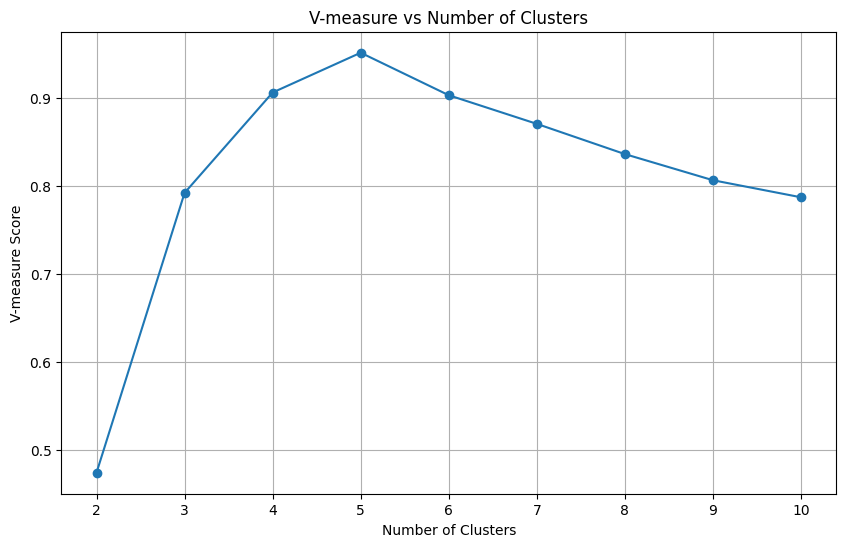

Optimal number of clusters: 5


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.datasets import make_blobs

def calculate_v_measure(X, true_labels, max_clusters=10):
    v_scores = []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        predicted_labels = kmeans.fit_predict(X)
        v_measure = v_measure_score(true_labels, predicted_labels)
        v_scores.append(v_measure)

    return cluster_range, v_scores

def plot_v_measure(cluster_range, v_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, v_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('V-measure Score')
    plt.title('V-measure vs Number of Clusters')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Generate sample data with true labels
    X, true_labels = make_blobs(n_samples=500, centers=5, random_state=42)

    # Calculate V-measure for a range of clusters
    cluster_range, v_scores = calculate_v_measure(X, true_labels, max_clusters=10)

    # Plot V-measure to find the optimal number of clusters
    plot_v_measure(cluster_range, v_scores)

    # Identify the optimal number of clusters
    optimal_clusters = cluster_range[np.argmax(v_scores)]
    print(f"Optimal number of clusters: {optimal_clusters}")


Q6. How can the V-measure be used to determine the optimal number of clusters in a clustering
algorithm?

The V-measure is an external evaluation metric for clustering algorithms that assesses the quality of the resulting clusters by comparing them to a known set of true labels. It is a harmonic mean of two components: **homogeneity** and **completeness**.

- **Homogeneity**: A clustering result satisfies homogeneity if all of its clusters contain only data points that are members of a single class.
- **Completeness**: A clustering result satisfies completeness if all data points that are members of a given class are elements of the same cluster.

The V-measure \(V\) is calculated as:

\[
V = 2 \times \frac{\text{homogeneity} \times \text{completeness}}{\text{homogeneity} + \text{completeness}}
\]

### How to Use V-measure to Determine the Optimal Number of Clusters

1. **Run Clustering with Different Numbers of Clusters**: Start by running your clustering algorithm (e.g., K-means) multiple times with different numbers of clusters (e.g., \(k = 2, 3, 4, \ldots, n\)).

2. **Calculate V-measure for Each Clustering**: For each clustering result, calculate the V-measure using the true labels of the data. This requires having a ground truth to compare against, which is not always available in unsupervised learning.

3. **Plot V-measure Against the Number of Clusters**: Create a plot with the number of clusters on the x-axis and the V-measure score on the y-axis.

4. **Identify the Optimal Number of Clusters**: The optimal number of clusters is typically indicated by the highest V-measure score. However, consider also the balance between homogeneity and completeness — the highest V-measure might correspond to a trade-off that provides a good clustering structure that respects both components.

### Notes on Using V-measure

- **Requires Ground Truth**: V-measure is an external validation metric, meaning it requires knowledge of the actual class labels (ground truth) to evaluate how well the clustering aligns with these classes.
- **Not Always Available**: In many real-world applications, the true labels are not available, making V-measure less practical in unsupervised scenarios without labeled data.
- **Use in Combination with Other Metrics**: For determining the optimal number of clusters, it's often useful to use the V-measure in combination with other metrics (like silhouette score or elbow method) to gain a more comprehensive understanding.

By analyzing the V-measure across different cluster numbers, you can determine the number of clusters that best balances homogeneity and completeness relative to the true labels, guiding you toward the optimal clustering solution.

Q7. What are some advantages and disadvantages of using the Silhouette Coefficient to evaluate a
clustering result?

The **Silhouette Coefficient** is a widely used metric for evaluating the quality of clustering results. It ranges from -1 to 1, where a higher value indicates better-defined clusters. However, it has both advantages and disadvantages.

### **Advantages:**
1. **Intuitive Interpretation**:
   - The Silhouette Coefficient provides an easy-to-understand measure. A value close to 1 means that the points are well-clustered and far from neighboring clusters, while values close to -1 indicate that points might be wrongly assigned.

2. **Considers Both Cohesion and Separation**:
   - It takes into account the tightness of clusters (intra-cluster cohesion) and the distance between clusters (inter-cluster separation), making it a balanced metric.

3. **No Assumptions About Cluster Shape**:
   - The Silhouette Coefficient does not make assumptions about the shape of clusters, making it versatile for different types of data distributions.

4. **Applicable to Various Clustering Algorithms**:
   - It can be used to evaluate the performance of a wide range of clustering algorithms, including K-means, hierarchical clustering, and DBSCAN.

### **Disadvantages:**
1. **Computationally Expensive**:
   - Calculating the Silhouette Coefficient requires computing distances between points and their neighboring clusters, which can be computationally intensive for large datasets.

2. **Sensitive to Cluster Density**:
   - The metric may not perform well in cases where clusters have varying densities, as it assumes that clusters are relatively compact and evenly separated.

3. **Less Effective for Complex Cluster Structures**:
   - The Silhouette Coefficient may struggle with data that has complex or overlapping cluster structures, where it might give misleadingly low scores despite a reasonable clustering.

4. **Bias Toward Convex Clusters**:
   - Since it relies on Euclidean distances, it tends to favor convex clusters and may not accurately reflect the quality of clusters that have non-convex shapes.

5. **Not Ideal for Evaluating Single Clusters**:
   - The coefficient is less informative for clustering results with a small number of clusters (e.g., 1 or 2 clusters), where it may fail to capture meaningful distinctions.

### **Conclusion:**
The Silhouette Coefficient is a useful tool for assessing clustering quality, especially for well-separated and compact clusters. However, its limitations should be considered, particularly when working with large, complex, or non-convex datasets.

Q8. What are some limitations of the Davies-Bouldin Index as a clustering evaluation metric? How can
they be overcome?

The **Davies-Bouldin Index (DBI)** is a clustering evaluation metric that measures the average similarity ratio of each cluster with its most similar cluster. It is based on both intra-cluster distance (cohesion) and inter-cluster distance (separation), with lower values indicating better clustering. However, the DBI has some limitations:

### **Limitations of the Davies-Bouldin Index:**

1. **Bias Toward Spherical Clusters:**
   - The DBI assumes that clusters are roughly spherical and equally sized. As a result, it may not perform well with clusters of different shapes, sizes, or densities.

2. **Sensitivity to Noise and Outliers:**
   - The DBI can be significantly affected by noise and outliers since they can increase the intra-cluster distance or reduce the inter-cluster distance, leading to poorer scores.

3. **Dependency on Cluster Centroids:**
   - The metric relies heavily on the centroids of clusters. For methods like DBSCAN, which can produce arbitrarily shaped clusters, the DBI might not accurately reflect clustering quality.

4. **Overemphasis on Similar Clusters:**
   - The DBI tends to penalize clusters that are similar in size and distance more heavily. This can lead to an overestimation of the quality of clustering for datasets where all clusters are somewhat similar, even if the overall clustering structure is poor.

5. **Computational Complexity:**
   - For large datasets, the calculation of intra-cluster and inter-cluster distances for all clusters can be computationally expensive.

6. **Poor Performance with High-Dimensional Data:**
   - In high-dimensional spaces, distances between points become less meaningful, which can result in unreliable DBI values.

### **Ways to Overcome These Limitations:**

1. **Use Alternative Metrics for Non-Spherical Clusters:**
   - For datasets with non-spherical clusters, consider using metrics like the Adjusted Rand Index (ARI) or the Silhouette Coefficient, which might provide more reliable evaluations for such data.

2. **Preprocess Data to Handle Noise and Outliers:**
   - Before applying clustering and evaluating with DBI, consider using techniques like outlier detection or dimensionality reduction to minimize the impact of noise and outliers.

3. **Apply DBI Selectively:**
   - Use the DBI alongside other evaluation metrics to get a more comprehensive view of clustering quality. For example, pairing it with the Silhouette Coefficient or Dunn Index can help balance its biases.

4. **Use Cluster Validity Indices Suited to the Clustering Algorithm:**
   - When working with algorithms that do not produce centroid-based clusters, consider using evaluation metrics designed for those methods, like the Density-Based Clustering Validation index (DBCV) for DBSCAN.

5. **Optimize Cluster Number and Parameters:**
   - Tuning the parameters of the clustering algorithm (e.g., the number of clusters in K-means) can help improve the DBI score by ensuring that the clusters are well-formed and separated.

### **Conclusion:**
While the Davies-Bouldin Index can provide useful insights into the quality of clustering, it has notable limitations, especially when dealing with non-spherical clusters, noise, or high-dimensional data. Combining it with other metrics and preprocessing techniques can help mitigate these limitations and provide a more accurate assessment of clustering quality.

Q9. What is the relationship between homogeneity, completeness, and the V-measure? Can they have
different values for the same clustering result?

Homogeneity, completeness, and the V-measure are related metrics used to evaluate the quality of clustering results. Here's how they relate to each other:

### 1. **Homogeneity:**
   - A clustering result satisfies homogeneity if all of its clusters contain only data points that are members of a single class.
   - In other words, each cluster should contain only points from one ground truth category.
   - Homogeneity ranges from 0 to 1, where 1 indicates perfect homogeneity.

### 2. **Completeness:**
   - Completeness is satisfied if all data points that are members of a given class are assigned to the same cluster.
   - It measures whether all members of a class are grouped together within the same cluster.
   - Completeness also ranges from 0 to 1, where 1 indicates perfect completeness.

### 3. **V-measure:**
   - V-measure is the harmonic mean of homogeneity and completeness. It combines both metrics to give a single score.
   - The formula for V-measure is:
     \[
     V\text{-measure} = 2 \times \frac{\text{Homogeneity} \times \text{Completeness}}{\text{Homogeneity} + \text{Completeness}}
     \]
   - V-measure ranges from 0 to 1, where 1 indicates both perfect homogeneity and completeness.

### Relationship and Differences:
   - **Trade-off:** Homogeneity and completeness can sometimes be at odds. For instance, a clustering that is perfectly homogeneous (each cluster contains only one class) may not be perfectly complete (all points of a class may not be in the same cluster) and vice versa.
   - **Same Values:** Homogeneity, completeness, and V-measure can have different values for the same clustering result. For example:
     - If a clustering is very homogeneous but not complete, the homogeneity score will be high, but completeness will be low, resulting in a moderate V-measure.
     - If both homogeneity and completeness are high, the V-measure will also be high.
     - If either homogeneity or completeness is very low, the V-measure will be lower than the higher of the two individual scores.

In summary, while the three metrics are related, they capture different aspects of clustering performance. Homogeneity and completeness can have different values, and the V-measure provides a balanced score reflecting both.

Q10. How can the Silhouette Coefficient be used to compare the quality of different clustering algorithms
on the same dataset? What are some potential issues to watch out for?

The **Silhouette Coefficient** is a useful metric for evaluating and comparing the quality of clustering algorithms on the same dataset. Here’s how it can be used and some potential issues to be aware of:

### **Using the Silhouette Coefficient to Compare Clustering Algorithms**

1. **Definition**: The Silhouette Coefficient for a single sample is defined as:
   \[
   s = \frac{b - a}{\max(a, b)}
   \]
   where:
   - **a** is the average distance between the sample and all other points in the same cluster (intra-cluster distance).
   - **b** is the average distance between the sample and all points in the nearest neighboring cluster (inter-cluster distance).

   The coefficient ranges from **-1 to +1**:
   - **+1** indicates that the sample is far from the neighboring clusters and well-clustered.
   - **0** indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
   - **-1** indicates that the sample might be assigned to the wrong cluster.

2. **Average Silhouette Score**: To evaluate the overall clustering performance, you calculate the average Silhouette Coefficient for all samples in the dataset. A higher average score indicates better-defined clusters.

3. **Comparison Across Algorithms**:
   - Run different clustering algorithms (e.g., K-Means, DBSCAN, Agglomerative Clustering) on the same dataset.
   - Compute the average Silhouette Score for each result.
   - Compare the scores: The algorithm with the highest average Silhouette Score typically indicates the best performance in terms of clustering quality.

### **Potential Issues to Watch Out For**

1. **Cluster Shape Sensitivity**:
   - The Silhouette Coefficient assumes that clusters are convex and well-separated. It may not perform well for clusters with irregular shapes or varying densities (e.g., those found by DBSCAN).

2. **Number of Clusters**:
   - The metric can be sensitive to the number of clusters. For instance, increasing the number of clusters usually increases intra-cluster similarity (higher `a` values), leading to a higher Silhouette Score. However, more clusters don’t necessarily mean better clustering quality if overfitting occurs.

3. **Imbalanced Cluster Sizes**:
   - If the dataset has clusters of vastly different sizes or densities, the Silhouette Coefficient might not adequately reflect the true clustering quality, as the "nearest cluster" for smaller clusters could be far away, inflating the score.

4. **Handling Noise and Outliers**:
   - Algorithms like DBSCAN, which handle noise, might have lower Silhouette Scores because noise points (outliers) often have negative or low Silhouette Coefficients. This can skew the average score, even if the meaningful clusters are well-formed.

5. **Interpretation**:
   - The Silhouette Score is useful but should not be the sole metric for evaluating clustering quality. It's essential to consider other factors, such as domain knowledge, visual inspection, or additional metrics (like Davies-Bouldin Index, Adjusted Rand Index) to ensure a comprehensive evaluation.

### **Conclusion**

The Silhouette Coefficient is a valuable tool for comparing clustering algorithms on the same dataset, but it has limitations. When using it, be cautious of issues like sensitivity to cluster shapes, cluster count, imbalanced sizes, and outliers. To get the best insight, use it alongside other evaluation metrics and context-specific considerations.

Q11. How does the Davies-Bouldin Index measure the separation and compactness of clusters? What are
some assumptions it makes about the data and the clusters?

The Davies-Bouldin Index (DBI) is a metric used to evaluate the quality of clustering algorithms. It measures the separation and compactness of clusters, aiming to find a balance between these two aspects. The DBI is calculated as follows:

### **Formula:**

For \( n \) clusters, the Davies-Bouldin Index is defined as:

\[
DBI = \frac{1}{n} \sum_{i=1}^{n} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
\]

Where:
- \( s_i \) is the intra-cluster distance (compactness) for cluster \( i \).
- \( d_{ij} \) is the inter-cluster distance (separation) between clusters \( i \) and \( j \).
- \( \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right) \) represents the worst-case scenario for cluster \( i \) relative to all other clusters.

### **Key Concepts:**

1. **Compactness (Intra-cluster distance, \( s_i \))**:
   - Measures how close the data points in a cluster are to the centroid of the cluster. It is typically calculated as the average distance between each point in the cluster and the cluster centroid.
   - Lower values indicate more compact clusters.

2. **Separation (Inter-cluster distance, \( d_{ij} \))**:
   - Measures the distance between the centroids of two clusters. It quantifies how well-separated the clusters are from each other.
   - Higher values indicate better-separated clusters.

3. **Davies-Bouldin Index**:
   - A lower DBI value indicates better clustering because it suggests that the clusters are compact and well-separated.
   - DBI tends to work well with spherical clusters, where a clear centroid can be identified.

### **Assumptions:**

1. **Spherical Clusters**:
   - The DBI assumes that the clusters are spherical, where the centroid effectively represents the cluster. This means it may not perform well with elongated, irregularly shaped, or non-convex clusters.

2. **Euclidean Distance**:
   - The metric typically assumes that Euclidean distance is an appropriate measure of both compactness and separation. If the data has a different geometry, the DBI might not give meaningful results.

3. **Similarity of Clusters**:
   - The DBI assumes that the clusters are of similar density and size. If the clusters have significant variations in density or size, the index might not accurately reflect the quality of clustering.

### **Limitations:**

- The DBI is sensitive to the number of clusters. As the number of clusters increases, the DBI might incorrectly indicate that more clusters are better.
- It does not perform well on clusters that are not well-separated or have irregular shapes.

In summary, the Davies-Bouldin Index evaluates the quality of clustering by balancing the trade-off between compactness (intra-cluster similarity) and separation (inter-cluster dissimilarity). However, its effectiveness relies on certain assumptions about the data and cluster shapes, particularly that clusters are spherical and evenly distributed.

Q12. Can the Silhouette Coefficient be used to evaluate hierarchical clustering algorithms? If so, how?

Yes, the Silhouette Coefficient can be used to evaluate hierarchical clustering algorithms, and it’s a useful method for assessing the quality of the clusters formed by these algorithms.

### How the Silhouette Coefficient Works

The Silhouette Coefficient combines two key factors for each point:

1. **Cohesion (a)**: The average distance from a point to all other points in the same cluster. A lower value indicates that the point is well-matched to its own cluster.

2. **Separation (b)**: The average distance from a point to all points in the nearest neighboring cluster (the next closest cluster to the point). A higher value indicates that the point is far from the points in the neighboring cluster.

The Silhouette Coefficient for a point is calculated as:
\[
s = \frac{b - a}{\max(a, b)}
\]
where:
- \( s \) ranges from -1 to 1.
- \( s \) close to 1 indicates that the point is well clustered.
- \( s \) close to 0 indicates that the point is on or very close to the decision boundary between two neighboring clusters.
- \( s \) close to -1 indicates that the point may have been assigned to the wrong cluster.

### Using the Silhouette Coefficient for Hierarchical Clustering

To use the Silhouette Coefficient with hierarchical clustering:

1. **Perform Hierarchical Clustering**: Use an appropriate linkage method (e.g., single, complete, average, or ward) and decide on the number of clusters by cutting the dendrogram at the desired level.

2. **Assign Points to Clusters**: After cutting the dendrogram, assign each data point to a cluster.

3. **Compute the Silhouette Score**: Calculate the Silhouette Coefficient for each data point based on the clusters formed.

4. **Evaluate Clustering Quality**: The average Silhouette Coefficient across all points provides an overall measure of the clustering quality. Higher average values suggest better-defined and well-separated clusters.

### Benefits and Considerations
- **Interpretation**: A high average Silhouette score indicates clear and well-separated clusters, while a low or negative score may indicate overlapping clusters or poor cluster assignments.
- **Comparison**: The Silhouette Coefficient allows for comparison between different clustering strategies or different numbers of clusters within the same dataset.

### Limitations
- **Assumption of Convexity**: The Silhouette Coefficient works best when clusters are convex and similar in size. For non-convex or varied-sized clusters, other validation methods might be more suitable.
- **Computational Complexity**: Calculating the Silhouette Coefficient for large datasets can be computationally expensive.

In summary, the Silhouette Coefficient is a valuable tool for evaluating hierarchical clustering algorithms, allowing for an objective assessment of clustering quality based on cohesion and separation of the clusters.